In [1]:
using Pkg
Pkg.activate("..")

  Activating project at `~/repos/ProactiveHRI.jl`


In [ ]:
Pkg.instantiate()
Pkg.update()

In [45]:
include("dynamics.jl")
include("planner.jl")
include("planner_utils.jl")
include("utils.jl")
include("plotting.jl")
include("mpc.jl")
include("sim.jl")
include("experiments.jl")

display_data (generic function with 1 method)

### Interaction planner

In [ ]:
dt = 0.1
velocity_max = 3.0
# human = SingleIntegratorPolar2D(dt, velocity_max, [pi, 2.])
human = Unicycle(dt, velocity_max, [1., 3.])

time_horizon = 25
# Q = zeros(Float64, human.state_dim, human.state_dim)
# R = diagm([0.; 0.1]) 
# Qt = diagm([10.; 10.])
Q = diagm([0.0; 0.0; 0.])
R = diagm([1.0; 0.1]) 
Qt = diagm([10.; 10.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.01]
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 3.0
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 3.])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)


In [ ]:
robot_initial_state = [5.; 5.; -pi / 2.; 0.]
robot_goal_state = [5.; -5.; -pi / 2; 0.]
human_initial_state = [5.; -5.; pi / 2]
human_goal_state = [5.; 5.; pi / 2]
solver = "ECOS"

ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)
# 
# ip = InteractionPlanner(human_hps, 
#                         robot_hps,
#                         human_initial_state,
#                         robot_initial_state,
#                         human_goal_state,
#                         robot_goal_state,
#                         solver)

In [ ]:
# Adds a wall constraint to the planner
wall_1 = Wall("x", 0., 6.1, "less")
wall_constraint(ip, wall_1, "wall_1")
wall_2 = Wall("x", 0.1, 3.2, "greater")
wall_constraint(ip, wall_2, "wall_2")

In [ ]:
incon_problem, xs, us = @time solve(ip.ego_planner.incon, iterations=10, verbose=false, keep_history=false)
incon_problem, xs, us = @time solve(ip.other_planner.incon, iterations=10, verbose=false, keep_history=false);



In [ ]:
plot_solve_solution(ip, walls=nothing, pos_xlims=[-1, 11], pos_ylims=[-6, 6])

# Iterated Best Response

In [ ]:
@time ibr(ip, 3, "ego")

In [ ]:
plot_solve_solution(ip, pos_xlims=[-1, 11], walls=nothing, pos_ylims=[-6, 6])

# Animation

In [ ]:
animation(ip, pos_xlims=[-1, 11], pos_ylims=[-4, 4])

In [ ]:
avoidance_animation(ip, pos_xlims=[0, 10], pos_ylims=[-5, 5])

# MPC Controller Simulation
*At the moment it is a known issue that the sim breaks if the dynamics classes used are different between the different InteractionPlanner models, will be fixed

In [ ]:
include("sim.jl")
include("mpc.jl")

In [ ]:
solver = "ECOS"

time_horizon = 25
dt = 0.1
velocity_max = 1.5

human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2

human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5

robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

In [ ]:
robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]

robot_ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)


In [ ]:
dt = 0.1
velocity_max = 1.5
human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

time_horizon = 25
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.3]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.0]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

In [ ]:
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

In [ ]:
robot_path, robot_controls, human_path, human_controls, solve_times = simulate(robot_ip, human_ip, 50, ibr_iterations=2, leader="ego")

In [ ]:
solve_times

In [ ]:
plt = plot(robot_path[:,1], robot_path[:,2], xlims=[-1, 10], ylims=[-5, 5])
plot!(plt, human_path[:,1], human_path[:,2])

In [ ]:
animation(robot_path, human_path, pos_xlims=[-1, 11], pos_ylims=[-2.5, 2.5])

# Summary Plots

### Setup the planner

In [ ]:
dt = 0.1
velocity_max = 1.5
# human = SingleIntegratorPolar2D(dt, velocity_max, [pi, 2.])
human = Unicycle(dt, velocity_max, [1., 1.5])

time_horizon = 50
# Q = zeros(Float64, human.state_dim, human.state_dim)
# R = diagm([0.; 0.1]) 
# Qt = diagm([10.; 10.])
Q = diagm([0.0; 0.0; 0.])
R = diagm([1.0; 0.0]) 
Qt = diagm([10.; 10.; 0.])
markup = 0.8
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.01]
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 3.])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)


In [ ]:
robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi]
human_goal_state = [0.; 0.; pi]
solver = "ECOS"

ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)

In [ ]:
incon_problem, xs, us = @time solve(ip.ego_planner.incon, iterations=10, verbose=false, keep_history=false)
incon_problem, xs, us = @time solve(ip.other_planner.incon, iterations=10, verbose=false, keep_history=false);

In [ ]:
@time saved_data_test, _, _, _, _ = ibr_save(ip, 2, "ego")

In [ ]:
plot_example = plot_solve_solution(saved_data_test, scatter=false, show_speed=true, show_control=true)

In [ ]:
function plot_solve_solution(problem::SaveData, second_problem::SaveData,show_theta::Bool; pos_xlims=[-1,11], pos_ylims=[-6, 6], scatter=true::Bool, show_speed=true::Bool, show_control=true::Bool)

    l = @layout [a b] 
    width=2000
    height=800
    alpha_plot = 0.7
    linewidth = 2
    markersize = 2
    markersize_large = 7
    ego_color = :blue
    other_color = :red

    global iterations = length(problem.previous_ips)

    alpha_ratio = 1 / (iterations + 1)
    N = problem.previous_ips[1].ego_planner.ideal.hps.time_horizon

    ego_goal_state = problem.previous_ips[1].ego_planner.ideal.opt_params.goal_state
    other_goal_state = problem.previous_ips[1].other_planner.ideal.opt_params.goal_state

    ego_dynamics = problem.previous_ips[1].ego_planner.ideal.hps.dynamics       # use first ip arbitrarily, any iteration will give the same values for these entries
    other_dynamics = problem.previous_ips[1].other_planner.ideal.hps.dynamics

    global ego_ctrl_dim = 2
    global other_ctrl_dim = 2

    # plotting position trajectory

    plot_traj = plot(size=(height, height), xlabel="x position", ylabel="y position", title="Position", margin=10mm, ylims=pos_ylims, xlims=pos_xlims, aspect_ratio=:equal)
    scatter!(ego_goal_state[1:1], ego_goal_state[2:2], marker=:star, markersize=markersize_large, color=ego_color, label="ego goal")
    scatter!(plot_traj, other_goal_state[1:1], other_goal_state[2:2], marker=:star, markersize=markersize_large, color=other_color, label="other goal")

    plot!(plot_traj, value.(problem.previous_ips[end].ego_planner.incon.model[:x])[:,1], value.(problem.previous_ips[end].ego_planner.incon.model[:x])[:,2], color=ego_color, linewidth=linewidth, label="Robot μ = 0.9", alpha=alpha_plot)

    plot!(plot_traj, value.(problem.previous_ips[end].other_planner.incon.model[:x])[:,1], value.(problem.previous_ips[end].other_planner.incon.model[:x])[:,2], color=other_color, linewidth=linewidth, label="Human μ = 0.9", alpha=alpha_plot)


    plot!(plot_traj, value.(second_problem.previous_ips[end].ego_planner.incon.model[:x])[:,1], value.(second_problem.previous_ips[end].ego_planner.incon.model[:x])[:,2], color=:purple, linewidth=linewidth, label="Robot μ = 1.1", alpha=alpha_plot)

    plot!(plot_traj, value.(second_problem.previous_ips[end].other_planner.incon.model[:x])[:,1], value.(second_problem.previous_ips[end].other_planner.incon.model[:x])[:,2], color=:green, linewidth=linewidth, label="Human μ = 1.1", alpha=alpha_plot)

    if scatter
        scatter!(plot_traj, value.(problem.previous_ips[end].ego_planner.ideal.model[:x])[:,1], value.(problem.previous_ips[end].ego_planner.ideal.model[:x])[:,2], color=ego_color, linewidth=linewidth, label="", alpha=alpha_plot)

        scatter!(plot_traj, value.(problem.previous_ips[end].other_planner.ideal.model[:x])[:,1], value.(problem.previous_ips[end].other_planner.ideal.model[:x])[:,2], color=other_color, linewidth=linewidth, label="", alpha=alpha_plot)

        scatter!(plot_traj, value.(second_problem.previous_ips[end].ego_planner.ideal.model[:x])[:,1], value.(second_problem.previous_ips[end].ego_planner.ideal.model[:x])[:,2], color=ego_color, linewidth=linewidth, label="", alpha=alpha_plot)

        scatter!(plot_traj, value.(second_problem.previous_ips[end].other_planner.ideal.model[:x])[:,1], value.(second_problem.previous_ips[end].other_planner.ideal.model[:x])[:,2], color=other_color, linewidth=linewidth, label="", alpha=alpha_plot)
    end
    # plotting speed/control

    # speed parameters
    max_speed = maximum([problem.previous_ips[1].ego_planner.ideal.hps.dynamics.velocity_max, problem.previous_ips[1].other_planner.ideal.hps.dynamics.velocity_max])
    ego_max_speed = problem.previous_ips[1].ego_planner.ideal.hps.dynamics.velocity_max
    other_max_speed = problem.previous_ips[1].other_planner.ideal.hps.dynamics.velocity_max

    # control parameters
    ego_ctrl_dim = problem.previous_ips[1].ego_planner.ideal.hps.dynamics.ctrl_dim
    other_ctrl_dim = problem.previous_ips[1].other_planner.ideal.hps.dynamics.ctrl_dim

    ego_max_ctrl = maximum(problem.previous_ips[1].ego_planner.ideal.hps.dynamics.control_max)
    ego_min_ctrl = minimum(problem.previous_ips[1].ego_planner.ideal.hps.dynamics.control_min)
    other_max_ctrl = maximum(problem.previous_ips[1].other_planner.ideal.hps.dynamics.control_max)
    other_min_ctrl = minimum(problem.previous_ips[1].other_planner.ideal.hps.dynamics.control_min)

    plot_theta = plot(size=(height, height), xlabel="time step", ylabel="abs(Theta)", title="Theta vs. time", margin=10mm, legend=:bottomright)
    plot_ctrl = plot(size=(height, height), xlabel="time step", ylabel="input magnitude", title="Control", margin=10mm)

    # angle plotting
    robot_xs_mu_09 = vector_of_vectors_to_matrix(problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_states)
    human_xs_mu_09 = vector_of_vectors_to_matrix(problem.previous_ips[iterations].other_planner.incon.opt_params.previous_states)
    robot_xs_mu_11 = vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_states)
    human_xs_mu_11 = vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].other_planner.incon.opt_params.previous_states)
    plot!(plot_theta, robot_xs_mu_09[:,3:3], linewidth=2, label="Robot μ = 0.9", color=ego_color)
    plot!(plot_theta, human_xs_mu_09[:,3:3], linewidth=2, label="Human μ = 0.9", color=other_color)
    plot!(plot_theta, robot_xs_mu_11[:,3:3], linewidth=2, label="Robot μ = 1.1", color=:magenta)
    plot!(plot_theta, human_xs_mu_11[:,3:3], linewidth=2, label="Human μ = 1.1", color=:green)

        # ctrl plotting
    plot!(plot_ctrl, 1:N, maximum([ego_max_ctrl, other_max_ctrl]) * ones(Float64, N), linestyle=:dash, linewith=linewidth,  color=:green, label="Control Limits")
    plot!(plot_ctrl, 1:N, minimum([ego_min_ctrl, other_min_ctrl]) * ones(Float64, N), linestyle=:dash, linewith=linewidth,  color=:green, label="")   
        # ego plot
    for j in 1:ego_ctrl_dim
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_controls)[:, j], label="", color=RGB(1 - (1 / ego_ctrl_dim) * j, 0., (1 / ego_ctrl_dim) * j), linewidth=linewidth, alpha=(i * alpha_ratio))
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].ego_planner.incon.opt_params.previous_controls)[:, j], label="", color=RGB(1 - (1 / ego_ctrl_dim) * j, 0., (1 / ego_ctrl_dim) * j), linewidth=linewidth, alpha=(i * alpha_ratio))
    end 
        # other plot
    for k in 1:other_ctrl_dim
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(problem.previous_ips[iterations].other_planner.incon.opt_params.previous_controls)[:, k], label="", color=RGB((1 / other_ctrl_dim) * k, 1 - (1 / other_ctrl_dim) * k, 0.), linewidth=linewidth, alpha=(i * alpha_ratio))
        plot!(plot_ctrl, 1:N, vector_of_vectors_to_matrix(second_problem.previous_ips[iterations].other_planner.incon.opt_params.previous_controls)[:, k], label="", color=RGB((1 / other_ctrl_dim) * k, 1 - (1 / other_ctrl_dim) * k, 0.), linewidth=linewidth, alpha=(i * alpha_ratio))
    end 


    slack_violation = Vector{Float64}(undef, iterations)

    for i in 1:iterations
        slack_violation[i] = value(problem.previous_ips[i].ego_planner.incon.model[:ϵ])
    end

    plot_slack_violation = plot(size=(height, height), xlabel="Iteration", ylabel="ϵ (slack value)", title="Slack (collision) Violation", margin=10mm)

    plot!(plot_slack_violation, 1:iterations, slack_violation, color=:black, label="Slack")

    # plotting inconvenience value over iterations

    incon_budget = problem.previous_ips[1].ego_planner.incon.hps.inconvenience_ratio
    inconvenience_ego = Vector{Float64}(undef, iterations)
    inconvenience_other = Vector{Float64}(undef, iterations)

    ideal_incon_ego = compute_convenience_value(ego_dynamics, matrix_to_vector_of_vectors(value.(problem.previous_ips[1].ego_planner.ideal.model[:x])), matrix_to_vector_of_vectors(value.(problem.previous_ips[1].ego_planner.ideal.model[:u])), ego_goal_state, problem.previous_ips[1].ego_planner.incon.hps.inconvenience_weights)

    ideal_incon_other = compute_convenience_value(other_dynamics, matrix_to_vector_of_vectors(value.(problem.previous_ips[1].other_planner.ideal.model[:x])), matrix_to_vector_of_vectors(value.(problem.previous_ips[1].other_planner.ideal.model[:u])), other_goal_state, problem.previous_ips[1].other_planner.incon.hps.inconvenience_weights)

    for i in 1:iterations
        inconvenience_ego[i] = compute_convenience_value(ego_dynamics, problem.previous_ips[i].ego_planner.incon.opt_params.previous_states, problem.previous_ips[i].ego_planner.incon.opt_params.previous_controls, ego_goal_state, problem.previous_ips[1].ego_planner.incon.hps.inconvenience_weights)
        
        inconvenience_other[i] = compute_convenience_value(other_dynamics, problem.previous_ips[i].other_planner.incon.opt_params.previous_states, problem.previous_ips[i].other_planner.incon.opt_params.previous_controls, other_goal_state, problem.previous_ips[1].other_planner.incon.hps.inconvenience_weights)
    end

    inconvenience_ego ./= ideal_incon_ego
    inconvenience_other ./= ideal_incon_other 

    plot_incon = plot(size=(height, height), xlabel="Iteration", ylabel="Inconvenience", title="Agent Inconvenience", margin=10mm)
    plot!(plot_incon, 1:iterations, ones(iterations), linestyle=:dash, linewith=linewidth, color=:green, label="Ideal Incon")
    plot!(plot_incon, 1:iterations, ones(iterations) .+ incon_budget, linestyle=:dash, linewith=linewidth, color=:black, label="Incon Budget")
    plot!(plot_incon, 1:iterations, inconvenience_ego, color=ego_color, linewidth=linewidth, label="Ego Incon")
    plot!(plot_incon, 1:iterations, inconvenience_other, color=other_color, linewidth=linewidth, label="Other Incon")

    plot(plot_traj, plot_theta, layout=l, size=(width, height))
end


# Sim Experimentation Utils

In [ ]:
robot_params = PlannerParams(robot_ip.ego_planner.incon.hps, robot_ip.ego_planner.incon.opt_params, robot_ip.other_planner.incon.hps, robot_ip.other_planner.incon.opt_params)
human_params = PlannerParams(human_ip.ego_planner.incon.hps, human_ip.ego_planner.incon.opt_params, human_ip.other_planner.incon.hps, human_ip.other_planner.incon.opt_params)

In [ ]:
sim_params = IPSimParams(robot_params, human_params)

In [ ]:
# robot_xs, robot_us, human_xs, human_us, solve_times = simulate(robot_ip, human_ip, 50, ibr_iterations=2, leader="other")

In [ ]:
sim_data = SimData(sim_params, solve_times, robot_path, robot_controls, human_path, human_controls)

In [ ]:
plot_solve_solution(sim_data)

In [ ]:
sim_data.solve_times

# Experimentation Code

In [ ]:
# for experiment in experiments
#     set up problem. Assign hyperparameters. Cycle through hps for each experiment
#     (markup, collision slack, trust region weights, incon weights, collision radius, incon ratio)
#     for opt_param in opt_params
#         assign new opt_params to the problem.
#         (initial states, goal states)
#         register the InteractionPlanner
#         run simulation
#         store data into dictionary w/ with key=run_number
#         (store: hps, opt_params, and paths) -- enough data to recreate the problem and plot Base.load_path_setup_code
#         delete interaction planner before cycling through the loop.
#     end
# end

In [ ]:
using ProgressBars

In [ ]:
# setting up the problem to be deep copied for experiments
# this is for experimentation where each agent correctly assumes the policy of the oteher agent

# setting up the robot planner
solver = "ECOS"

time_horizon = 25
dt = 0.1
velocity_max = 1.5

human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2

human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5

robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]

robot_ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)
                             
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

### Mohr's Circle-ish Implementation 

In [ ]:
include("experiments.jl")

In [ ]:
test_human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

In [ ]:
robot_states = mohrs_circle_states(test_human, [0., 0., 0., 0.], [10., 0., 0., 0.], pi / 6);

In [ ]:
human_states = [([10., 0., pi, 0.], [0., 0., pi, 0.])]

### Simulation Code

In [ ]:
sim_test = simulation_sweep(robot_ip, human_ip, 50, robot_states, human_states)

In [ ]:
plot_solve_solution(sim_test["Run 12"], pos_xlims=[-1, 11], pos_ylims=[-6, 6])

# Data Metrics

In [ ]:
compute_average_control_effort(sim_data)

In [ ]:
compute_average_acceleration_per_segment(sim_data)

In [ ]:
compute_path_efficiency(sim_data)

In [ ]:
compute_path_irregularity_index(sim_data)

In [ ]:
compute_minimum_distance(sim_data)

In [ ]:
ttc = compute_time_to_collision(sim_data)
# ttc["Time to collision"]
# plot(1:50, ttc["Time to collision"])

In [ ]:
compute_dθ_dt(sim_data)

In [ ]:
compute_θ(sim_data)

In [ ]:
compute_time(sim_data)

In [ ]:
test_data_sweep_metrics = evaluate_sim(sim_test)

In [ ]:
test_data_sweep_metrics["Run 5"].plots["Combined Plot"]

In [ ]:
display_data(test_data_sweep_metrics)

# Social Force Model Sim

In [ ]:
ego = DoubleIntegrator2D(dt, 3., [1., 3.])

In [ ]:
include("human.jl")

In [ ]:
# example usage
state = [1.; 0.; 1.; 0.]
goal_position = [10.; 1.]
others = [[ego, [2; 0.; 0.0; 0.]]]
desired_velocity = 2.
forces = social_forces(ego, state, goal_position, others, desired_velocity, p=2., ψ=pi/6, c=0.3)
# 
markersize = 15
scatter(state[1:1], state[2:2], markersize=markersize, label="ego", aspect_ratio=:equal)
for (_, o) in others
    scatter!(o[1:1], o[2:2], markersize=markersize, label="other")
end
scatter!(goal_position[1:1], goal_position[2:2], markersize=markersize, label="goal")
plot!([state[1], state[1] + forces[1]], [state[2], state[2] + forces[2]], label="force", linewidth=5, color="black")

In [ ]:
get_position(robot_sfm, [1.; 1.])

In [ ]:
forces

In [ ]:
include("sim.jl")

In [ ]:
# setting up the problem to be deep copied for experiments
# this is for experimentation where each agent correctly assumes the policy of the oteher agent

# setting up the robot planner
solver = "ECOS"

time_horizon = 25
dt = 0.1
velocity_max = 1.5

human = Unicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2

human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5

robot = Unicycle(dt, velocity_max, [1., 1.5])

Q = diagm([0.0; 0.0; 0.])
R = diagm([1.; 1.]) 
Qt = diagm([10.; 10.; 0.])

collision_slack = 150.

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

robot_initial_state = [0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.]
human_initial_state = [10.; -0.05; pi]
human_goal_state = [0.; 0.; pi]

robot_ip = InteractionPlanner(robot_hps, 
                        human_hps,
                        robot_initial_state,
                        human_initial_state,
                        robot_goal_state,
                        human_goal_state,
                        solver)
                             
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

In [ ]:
ego_params = PlannerParams(human_ip.ego_planner.incon.hps, human_ip.ego_planner.incon.opt_params, robot_ip.ego_planner.incon.hps, robot_ip.ego_planner.incon.opt_params)
other_params = PlannerParams(robot_ip.ego_planner.incon.hps, robot_ip.ego_planner.incon.opt_params, human_ip.ego_planner.incon.hps, human_ip.ego_planner.incon.opt_params)
sim_params = IPSimParams(ego_params, other_params)

In [ ]:
human_states, human_control, robot_states, robot_controls = simulate_human_social_forces(human_ip, ego, [0.; 0.; 0.; 0.], [10.; 0.; 0.; 0.], 50)

In [ ]:
sim_data = SimData(sim_params, ([0.], nothing), human_states, human_control, robot_states, robot_controls)

In [ ]:
sfm_metrics = evaluate_sim(sim_data)

In [ ]:
display_sfm_metrics = Dict("Run 1" => sfm_metrics, "Run 2" => sfm_metrics)

In [ ]:
display_data(display_sfm_metrics)

In [ ]:
good_human_states, good_human_controls, good_robot_states, good_robot_controls, solve_times = simulate(human_ip, robot_ip, 50)

In [ ]:
good_sim_data = SimData(sim_params, solve_times, good_human_states, good_human_controls, good_robot_states, good_robot_controls)

In [ ]:
good_sim_data = evaluate_sim(good_sim_data)

In [ ]:
display_ip_metrics = Dict("Run 1" => good_sim_data, "Run 2" => good_sim_data)

In [ ]:
display_data(display_ip_metrics)

In [ ]:
animation((human_states), (robot_states))

In [ ]:
animation(good_human_states, good_robot_states)

In [ ]:
compute_path_irregularity_index(sim_data)

# Experimental Setup

In [ ]:
using Serialization

In [ ]:
test_human_ip = deserialize("../experimental_setup/cooperative_human_ip.dat")

In [ ]:
circular_experiment_states = mohrs_circle_states(robot_ip.ego_planner.incon.hps.dynamics, [0.; 0.; 0.; 0.], [10.; 0.; 0.; 0.], π/20)

In [ ]:
serialize("../experimental_setup/circular_experiment_states", circular_experiment_states)

In [ ]:
run_experiment(robot_ip, test_human_ip, 50, circular_experiment_states, [([10.; 0.; pi; 0.], [0.; 0.; pi; 0.])], "experimental_setup/metrics_test.dat")

In [ ]:
metrics = deserialize("experimental_setup/metrics_test.dat")
display_data(metrics)

In [ ]:
using JLD2

In [ ]:
proactiveHRI_robot_cooperative_human = deserialize("../experimental_results/ProactiveHRI_robot_cooperative_human.dat")
proactiveHRI_robot_less_cooperative_human = deserialize("../experimental_results/ProactiveHRI_robot_less-cooperative_human.dat")
proactiveHRI_robot_unaware_human = deserialize("../experimental_results/ProactiveHRI_robot_unaware_human.dat")
proactiveHRI_robot_aware_human = deserialize("../experimental_results/ProactiveHRI_robot_overly_aware__human.dat")

In [ ]:
display_data(proactiveHRI_robot_aware_human)

# Social Forces Sim w/ Dynamically Extended Unicycle Model

In [39]:
# setting up the human planner to be used for experiments (cooperative human)
solver = "ECOS"
dt = 0.1
velocity_max = 1.5
human = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

time_horizon = 25
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.3]) 
Qt = diagm([10.; 10.; 0.; 0.])
markup = 1.05
collision_slack = 150.
trust_region_weight = 5.
inconvenience_weights = [1.; 1.; 0.1]
collision_radius = 1.
inconvenience_ratio = 0.2


human_hps = PlannerHyperparameters(dynamics=human,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)



dt = 0.1
velocity_max = 1.5
# robot = Unicycle(dt, velocity_max, [1.0, 2.])
robot = DynamicallyExtendedUnicycle(dt, velocity_max, [1., 1.5])

# time_horizon = 45
Q = diagm([0.0; 0.0; 0.; 0.])
R = diagm([1.; 0.0]) 
Qt = diagm([10.; 10.; 0.; 0.])

robot_hps = PlannerHyperparameters(dynamics=robot,
                             time_horizon=time_horizon,
                             Q=Q,
                             R=R,
                             Qt=Qt,
                             markup=markup,
                             collision_slack=collision_slack,
                             trust_region_weight=trust_region_weight,
                             inconvenience_weights=inconvenience_weights,
                             collision_radius=collision_radius,
                             inconvenience_ratio=inconvenience_ratio)

robot_initial_state = [0.; 0.; 0.; 0.]
robot_goal_state = [10.; 0.; 0.; 0.]
human_initial_state = [10.; 0.; pi; 0.]
human_goal_state = [0.; 0.; pi; 0.]
# setting up the IP object to be serialized and saved for all trials
human_ip = InteractionPlanner(human_hps, 
                        robot_hps,
                        human_initial_state,
                        robot_initial_state,
                        human_goal_state,
                        robot_goal_state,
                        solver)

# saving object
# serialize("../experimental_setup/cooperative_human_ip.dat", human_ip)

InteractionPlanner
  ego_planner: AgentPlanner
  other_planner: AgentPlanner


In [40]:
robot = DynamicallyExtendedUnicycle(dt, 2., [1., 2.])

DynamicallyExtendedUnicycle{Float64}
  dt: Float64 0.1
  state_dim: Int64 4
  ctrl_dim: Int64 2
  velocity_min: Float64 0.0
  velocity_max: Float64 2.0
  control_min: Array{Float64}((2,)) [-1.0, -2.0]
  control_max: Array{Float64}((2,)) [1.0, 2.0]


In [19]:
ego_params = PlannerParams(human_ip.other_planner.incon.hps, human_ip.other_planner.incon.opt_params, human_ip.ego_planner.incon.hps, human_ip.ego_planner.incon.opt_params)
other_params = PlannerParams(human_ip.ego_planner.incon.hps, human_ip.ego_planner.incon.opt_params, human_ip.other_planner.incon.hps, human_ip.other_planner.incon.opt_params)
sim_params = IPSimParams(ego_params, other_params)

IPSimParams(PlannerParams(PlannerHyperparameters{Float64}
  dynamics: DynamicallyExtendedUnicycle{Float64}
  time_horizon: Int64 25
  Q: Array{Float64}((4, 4)) [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  R: Array{Float64}((2, 2)) [1.0 0.0; 0.0 0.0]
  Qt: Array{Float64}((4, 4)) [10.0 0.0 0.0 0.0; 0.0 10.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0]
  markup: Float64 1.05
  collision_slack: Float64 150.0
  collision_markup: Float64 0.98
  trust_region_weight: Float64 5.0
  inconvenience_weights: Array{Float64}((3,)) [1.0, 1.0, 0.1]
  collision_radius: Float64 1.0
  inconvenience_ratio: Float64 0.2
, PlannerOptimizerParams{Float64}
  As: Array{Matrix{Float64}}((25,))
  Bs: Array{Matrix{Float64}}((25,))
  Cs: Array{Vector{Float64}}((25,))
  Gs: Array{Vector{Float64}}((26,))
  Hs: Array{Float64}((26,)) [99.00000002246442, 98.8500001399322, 98.40000043867742, 97.65000093008476, 96.60000168407375, 95.25000282034334, 93.60000452041082, 91.65000713406478, 89.4000129164

In [20]:
ego_states, ego_controls, other_states, other_controls = simulate_human_social_forces(robot, human_ip, [0.; 0.; 0.; 0.], [10.; 0.; 0.; 0.], 50)

DynamicallyExtendedUnicycle{Float64}

([0.0 0.0 0.0 0.0; 0.004989893079499825 0.0 0.0 0.09979786158999648; … ; 5.819792468345285 0.19587656273005508 0.10164841160627623 1.6845725720847269; 5.988574490722056 0.21255458843463626 0.09535428075426118 1.7075136639965907], [0.0 0.9979786158999647; 0.9999999999999999 0.9481418280742918; … ; -0.05568316444830229 0.24901709354476942; -0.06294130852015056 0.22941091911863673], [10.00000000112322 8.177052497046946e-10 3.1415926538813843 -2.859141557728453e-9; 9.99250017831022 4.6092710772517095e-5 3.1323741746341742 0.14999964585986442; … ; 3.5782901174384967 -0.9775665099051265 2.9960326133217356 1.4999997966129002; 3.43013873771626 -0.9544125493813833 2.9770872494435294 1.4990407000007195], [-0.09218479247210248 1.4999964871900597; 0.06354598646922492 1.4999969309945131; … ; -0.21894757828353448 1.6624392959160148e-6; -0.18945363878206392 -0.009590966121806314])

In [21]:
sfm_sim_data = SimData(sim_params, ([0.], nothing), ego_states, ego_controls, other_states, other_controls)
sfm_data_for_eval = Dict("Run 1" => sfm_sim_data, "Run 2" => sfm_sim_data)
metrics = evaluate_sim(sfm_data_for_eval)

0.0%┣                                                ┫ 0/2 [00:00<00:00, -0s/it]


5151

50.0%┣█████████████████████▌                     ┫ 1/2 [00:04<Inf:Inf, InfGs/it]


5151

100.0%┣██████████████████████████████████████████████┫ 2/2 [00:10<00:00, 10s/it]
100.0%┣██████████████████████████████████████████████┫ 2/2 [00:10<00:00, 10s/it]


Dict{String, SimMetrics} with 2 entries:
  "Run 2" => SimMetrics(Dict("Ego Avg Control Effort"=>0.383445, "Other Avg Con…
  "Run 1" => SimMetrics(Dict("Ego Avg Control Effort"=>0.383445, "Other Avg Con…

In [22]:
display_data(metrics)

GtkLabelLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=100, margin=100, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=TRUE, expand=FALSE, scale-factor=1, xpad, ypad, label="<b><u>Sim 2 Metrics</u></b>
<b> </b> 
<b>Ego Average Acceleration = </b>0.3369
<b>Other Average Acceleration = </b>0.3
<b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-<

┌ Info: Saved animation to /tmp/jl_03ChAlOduv.gif
└ @ Plots /home/jasper/.julia/packages/Plots/3BCH5/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_03ChAlOduv.gif")
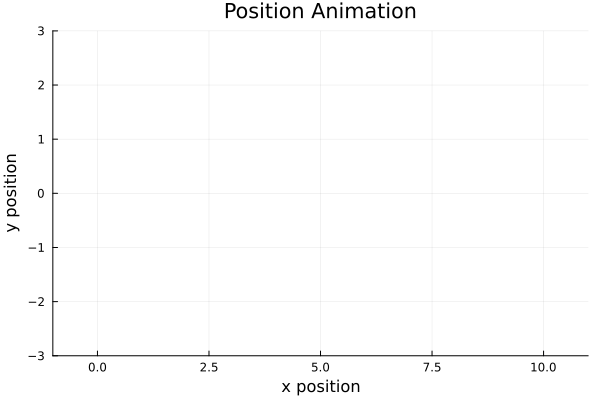

In [24]:
animation(ego_states, other_states, pos_xlims=[-1, 11], pos_ylims=[-3, 3])

In [25]:
function simulation_sweep(ego::DynamicallyExtendedUnicycle, other_ip::InteractionPlanner, sim_horizon, ego_boundary_conditions::Vector{Tuple{Vector{Float64}, Vector{Float64}}}, other_boundary_conditions::Vector{Tuple{Vector{Float64}, Vector{Float64}}})
    runs = maximum([length(ego_boundary_conditions), length(other_boundary_conditions)])

    ego_ego_hps = other_ip.other_planner.incon.hps
    ego_other_hps = other_ip.ego_planner.incon.hps
    other_ego_hps = other_ip.ego_planner.incon.hps
    other_other_hps = other_ip.other_planner.incon.hps

    if length(ego_boundary_conditions) == 1 
        for i in 1:(runs - 1)
            push!(ego_boundary_conditions, ego_boundary_conditions[1])
        end
    elseif length(other_boundary_conditions) == 1
        for i in 1:(runs - 1)
            push!(other_boundary_conditions, other_boundary_conditions[1])
        end
    end

    if length(ego_boundary_conditions) != length(other_boundary_conditions)
        throw(ArgumentError("length of 'ego_boundary_conditions' and 'other_boundary_conditions' must match"))
    end

    runs_dict = Dict{String, SimData}()

    for j in ProgressBar(1:runs)
        sim_other_ip = InteractionPlanner(other_ego_hps, other_other_hps, other_boundary_conditions[j][1], ego_boundary_conditions[j][1], other_boundary_conditions[j][2], ego_boundary_conditions[j][2], "ECOS")

        ego_params = PlannerParams(sim_other_ip.other_planner.incon.hps, sim_other_ip.other_planner.incon.opt_params, sim_other_ip.ego_planner.incon.hps, sim_other_ip.ego_planner.incon.opt_params)
        other_params = PlannerParams(sim_other_ip.ego_planner.incon.hps, sim_other_ip.ego_planner.incon.opt_params, sim_other_ip.other_planner.incon.hps, sim_other_ip.other_planner.incon.opt_params)

        sim_params = IPSimParams(ego_params, other_params)

        ego_states, ego_controls, other_states, other_controls = simulate_human_social_forces(ego, sim_other_ip, ego_boundary_conditions[j][1], ego_boundary_conditions[j][2], sim_horizon)

        sim_data = SimData(sim_params, ([0.], nothing), ego_states, ego_controls, other_states, other_controls)

        runs_dict["Run $(j)"] = sim_data

        # deleting variables
        sim_ego_ip = nothing
        sim_other_ip = nothing
        ego_params = nothing
        other_params = nothing
        sim_params = nothing
        ego_states = nothing
        ego_controls = nothing
        other_states = nothing
        other_controls = nothing
        sim_data = nothing
    end

    runs_dict
end

simulation_sweep (generic function with 2 methods)

In [41]:
circular_states = mohrs_circle_states(robot, [0.; 0.; 0.; 0.], [10.; 0.; 0.; 0.], π/20)

40-element Vector{Tuple{Vector{Float64}, Vector{Float64}}}:
 ([0.0, 0.0, 0.0, 0.0], [10.0, 0.0, 0.0, 0.0])
 ([0.061558297024310704, -0.7821723252011543, 0.15707963267948966, 0.0], [9.93844170297569, 0.7821723252011543, 0.15707963267948966, 0.0])
 ([0.24471741852423268, -1.545084971874737, 0.3141592653589793, 0.0], [9.755282581475768, 1.545084971874737, 0.3141592653589793, 0.0])
 ([0.5449673790581606, -2.2699524986977337, 0.47123889803846897, 0.0], [9.45503262094184, 2.2699524986977337, 0.47123889803846897, 0.0])
 ([0.9549150281252627, -2.938926261462366, 0.6283185307179586, 0.0], [9.045084971874736, 2.938926261462366, 0.6283185307179586, 0.0])
 ([1.4644660940672622, -3.5355339059327373, 0.7853981633974483, 0.0], [8.535533905932738, 3.5355339059327373, 0.7853981633974483, 0.0])
 ([2.061073738537634, -4.045084971874737, 0.9424777960769379, 0.0], [7.938926261462366, 4.045084971874737, 0.9424777960769379, 0.0])
 ([2.730047501302266, -4.455032620941839, 1.0995574287564276, 0.0], [7.26995249

In [42]:
sfm_sweep_test = simulation_sweep(robot, human_ip, 50, circular_states, [([10.; 0.; pi; 0.], [0.; 0.; pi; 0.])])

0.0%┣                                               ┫ 0/40 [00:00<00:00, -0s/it]


DynamicallyExtendedUnicycle{Float64}

DynamicallyExtendedUnicycle{Float64}

2.5%┣█                                          ┫ 1/40 [00:05<Inf:Inf, InfGs/it]


DynamicallyExtendedUnicycle{Float64}

5.0%┣██▍                                            ┫ 2/40 [00:11<06:51, 11s/it]


DynamicallyExtendedUnicycle{Float64}

7.5%┣███▋                                            ┫ 3/40 [00:16<05:02, 8s/it]


DynamicallyExtendedUnicycle{Float64}

10.0%┣████▊                                          ┫ 4/40 [00:22<04:21, 7s/it]


DynamicallyExtendedUnicycle{Float64}

12.5%┣█████▉                                         ┫ 5/40 [00:27<03:59, 7s/it]


DynamicallyExtendedUnicycle{Float64}

15.0%┣███████                                        ┫ 6/40 [00:33<03:44, 7s/it]


DynamicallyExtendedUnicycle{Float64}

17.5%┣████████▎                                      ┫ 7/40 [00:39<03:33, 6s/it]


DynamicallyExtendedUnicycle{Float64}

20.0%┣█████████▍                                     ┫ 8/40 [00:44<03:22, 6s/it]


DynamicallyExtendedUnicycle{Float64}

22.5%┣██████████▋                                    ┫ 9/40 [00:50<03:14, 6s/it]


DynamicallyExtendedUnicycle{Float64}

25.0%┣███████████▌                                  ┫ 10/40 [00:56<03:06, 6s/it]


DynamicallyExtendedUnicycle{Float64}

27.5%┣████████████▋                                 ┫ 11/40 [01:02<02:59, 6s/it]


DynamicallyExtendedUnicycle{Float64}

30.0%┣█████████████▉                                ┫ 12/40 [01:07<02:51, 6s/it]


DynamicallyExtendedUnicycle{Float64}

32.5%┣███████████████                               ┫ 13/40 [01:13<02:44, 6s/it]


DynamicallyExtendedUnicycle{Float64}

35.0%┣████████████████                              ┫ 14/40 [01:18<02:36, 6s/it]


DynamicallyExtendedUnicycle{Float64}

37.5%┣█████████████████▎                            ┫ 15/40 [01:24<02:30, 6s/it]


DynamicallyExtendedUnicycle{Float64}

40.0%┣██████████████████▍                           ┫ 16/40 [01:29<02:23, 6s/it]


DynamicallyExtendedUnicycle{Float64}

42.5%┣███████████████████▌                          ┫ 17/40 [01:35<02:16, 6s/it]


DynamicallyExtendedUnicycle{Float64}

45.0%┣████████████████████▊                         ┫ 18/40 [01:40<02:10, 6s/it]


DynamicallyExtendedUnicycle{Float64}

47.5%┣█████████████████████▉                        ┫ 19/40 [01:46<02:03, 6s/it]


DynamicallyExtendedUnicycle{Float64}

50.0%┣███████████████████████                       ┫ 20/40 [01:51<01:57, 6s/it]


DynamicallyExtendedUnicycle{Float64}

52.5%┣████████████████████████▏                     ┫ 21/40 [01:56<01:51, 6s/it]


DynamicallyExtendedUnicycle{Float64}

55.0%┣█████████████████████████▎                    ┫ 22/40 [02:02<01:45, 6s/it]


DynamicallyExtendedUnicycle{Float64}

57.5%┣██████████████████████████▌                   ┫ 23/40 [02:08<01:39, 6s/it]


DynamicallyExtendedUnicycle{Float64}

60.0%┣███████████████████████████▋                  ┫ 24/40 [02:13<01:33, 6s/it]


DynamicallyExtendedUnicycle{Float64}

62.5%┣████████████████████████████▊                 ┫ 25/40 [02:19<01:27, 6s/it]


DynamicallyExtendedUnicycle{Float64}

65.0%┣██████████████████████████████                ┫ 26/40 [02:25<01:21, 6s/it]


DynamicallyExtendedUnicycle{Float64}

67.5%┣███████████████████████████████               ┫ 27/40 [02:31<01:15, 6s/it]


DynamicallyExtendedUnicycle{Float64}

70.0%┣████████████████████████████████▏             ┫ 28/40 [02:36<01:09, 6s/it]


DynamicallyExtendedUnicycle{Float64}

72.5%┣█████████████████████████████████▍            ┫ 29/40 [02:42<01:04, 6s/it]


DynamicallyExtendedUnicycle{Float64}

75.0%┣██████████████████████████████████▌           ┫ 30/40 [02:48<00:58, 6s/it]


DynamicallyExtendedUnicycle{Float64}

77.5%┣███████████████████████████████████▋          ┫ 31/40 [02:54<00:52, 6s/it]


DynamicallyExtendedUnicycle{Float64}

80.0%┣████████████████████████████████████▉         ┫ 32/40 [03:00<00:47, 6s/it]


DynamicallyExtendedUnicycle{Float64}

82.5%┣██████████████████████████████████████        ┫ 33/40 [03:06<00:41, 6s/it]


DynamicallyExtendedUnicycle{Float64}

85.0%┣███████████████████████████████████████       ┫ 34/40 [03:12<00:35, 6s/it]


DynamicallyExtendedUnicycle{Float64}

87.5%┣████████████████████████████████████████▎     ┫ 35/40 [03:18<00:29, 6s/it]


DynamicallyExtendedUnicycle{Float64}

90.0%┣█████████████████████████████████████████▍    ┫ 36/40 [03:24<00:23, 6s/it]


DynamicallyExtendedUnicycle{Float64}

92.5%┣██████████████████████████████████████████▌   ┫ 37/40 [03:29<00:17, 6s/it]


DynamicallyExtendedUnicycle{Float64}

95.0%┣███████████████████████████████████████████▊  ┫ 38/40 [03:35<00:12, 6s/it]


DynamicallyExtendedUnicycle{Float64}

97.5%┣████████████████████████████████████████████▉ ┫ 39/40 [03:41<00:06, 6s/it]


100.0%┣█████████████████████████████████████████████┫ 40/40 [03:47<00:00, 6s/it]
100.0%┣█████████████████████████████████████████████┫ 40/40 [03:47<00:00, 6s/it]


Dict{String, SimData} with 40 entries:
  "Run 17" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 21" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 20" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 4"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 35" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 39" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 10" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 22" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 32" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 40" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 25" => SimData(IPSimParams(PlannerParams(PlannerHyperparameters{Float64}…
  "Run 1"  => SimData(IPSimParams(PlannerParams(PlannerHyperparameters

In [61]:
include("experiments.jl")

display_data (generic function with 1 method)

In [62]:
metrics = evaluate_sim(sfm_sweep_test)

0.0%┣                                               ┫ 0/40 [00:00<00:00, -0s/it]


5151

2.5%┣█                                          ┫ 1/40 [00:08<Inf:Inf, InfGs/it]


5151

5.0%┣██▍                                            ┫ 2/40 [00:13<08:19, 13s/it]


5151

7.5%┣███▋                                            ┫ 3/40 [00:19<05:45, 9s/it]


5151

10.0%┣████▊                                          ┫ 4/40 [00:24<04:50, 8s/it]


5151

12.5%┣█████▉                                         ┫ 5/40 [00:30<04:19, 7s/it]


5151

15.0%┣███████                                        ┫ 6/40 [00:35<03:58, 7s/it]


5151

17.5%┣████████▎                                      ┫ 7/40 [00:40<03:43, 7s/it]


5151

20.0%┣█████████▍                                     ┫ 8/40 [00:46<03:31, 7s/it]


5151

22.5%┣██████████▋                                    ┫ 9/40 [00:52<03:20, 6s/it]


5151

25.0%┣███████████▌                                  ┫ 10/40 [00:57<03:11, 6s/it]


5151

27.5%┣████████████▋                                 ┫ 11/40 [01:03<03:02, 6s/it]


5151

30.0%┣█████████████▉                                ┫ 12/40 [01:08<02:54, 6s/it]


5151

32.5%┣███████████████                               ┫ 13/40 [01:14<02:46, 6s/it]


5151

35.0%┣████████████████                              ┫ 14/40 [01:19<02:39, 6s/it]


5151

37.5%┣█████████████████▎                            ┫ 15/40 [01:25<02:32, 6s/it]


5151

40.0%┣██████████████████▍                           ┫ 16/40 [01:30<02:25, 6s/it]


5151

42.5%┣███████████████████▌                          ┫ 17/40 [01:36<02:18, 6s/it]


5151

45.0%┣████████████████████▊                         ┫ 18/40 [01:41<02:11, 6s/it]


5151

47.5%┣█████████████████████▉                        ┫ 19/40 [01:47<02:05, 6s/it]


5151

50.0%┣███████████████████████                       ┫ 20/40 [01:52<01:58, 6s/it]


5151

52.5%┣████████████████████████▏                     ┫ 21/40 [01:58<01:52, 6s/it]


5151

55.0%┣█████████████████████████▎                    ┫ 22/40 [02:03<01:46, 6s/it]


5151

57.5%┣██████████████████████████▌                   ┫ 23/40 [02:09<01:39, 6s/it]


5151

60.0%┣███████████████████████████▋                  ┫ 24/40 [02:14<01:33, 6s/it]


5151

62.5%┣████████████████████████████▊                 ┫ 25/40 [02:19<01:27, 6s/it]


5151

65.0%┣██████████████████████████████                ┫ 26/40 [02:25<01:21, 6s/it]


5151

67.5%┣███████████████████████████████               ┫ 27/40 [02:31<01:15, 6s/it]


5151

70.0%┣████████████████████████████████▏             ┫ 28/40 [02:36<01:09, 6s/it]


5151

72.5%┣█████████████████████████████████▍            ┫ 29/40 [02:42<01:03, 6s/it]


5151

75.0%┣██████████████████████████████████▌           ┫ 30/40 [02:47<00:58, 6s/it]


5151

77.5%┣███████████████████████████████████▋          ┫ 31/40 [02:53<00:52, 6s/it]


5151

80.0%┣████████████████████████████████████▉         ┫ 32/40 [02:58<00:46, 6s/it]


5151

82.5%┣██████████████████████████████████████        ┫ 33/40 [03:04<00:40, 6s/it]


5151

85.0%┣███████████████████████████████████████       ┫ 34/40 [03:10<00:34, 6s/it]


5151

87.5%┣████████████████████████████████████████▎     ┫ 35/40 [03:15<00:29, 6s/it]


5151

90.0%┣█████████████████████████████████████████▍    ┫ 36/40 [03:21<00:23, 6s/it]


5151

92.5%┣██████████████████████████████████████████▌   ┫ 37/40 [03:26<00:17, 6s/it]


5151

95.0%┣███████████████████████████████████████████▊  ┫ 38/40 [03:32<00:11, 6s/it]


5151

97.5%┣████████████████████████████████████████████▉ ┫ 39/40 [03:37<00:06, 6s/it]


5151

100.0%┣█████████████████████████████████████████████┫ 40/40 [03:43<00:00, 6s/it]
100.0%┣█████████████████████████████████████████████┫ 40/40 [03:43<00:00, 6s/it]


Dict{String, SimMetrics} with 40 entries:
  "Run 17" => SimMetrics(Dict("Ego Avg Control Effort"=>0.350665, "Other Avg Co…
  "Run 21" => SimMetrics(Dict("Ego Avg Control Effort"=>0.470016, "Other Avg Co…
  "Run 20" => SimMetrics(Dict("Ego Avg Control Effort"=>0.506507, "Other Avg Co…
  "Run 4"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.382971, "Other Avg Co…
  "Run 35" => SimMetrics(Dict("Ego Avg Control Effort"=>0.38123, "Other Avg Con…
  "Run 39" => SimMetrics(Dict("Ego Avg Control Effort"=>0.382181, "Other Avg Co…
  "Run 10" => SimMetrics(Dict("Ego Avg Control Effort"=>0.36731, "Other Avg Con…
  "Run 22" => SimMetrics(Dict("Ego Avg Control Effort"=>0.406366, "Other Avg Co…
  "Run 32" => SimMetrics(Dict("Ego Avg Control Effort"=>0.371574, "Other Avg Co…
  "Run 40" => SimMetrics(Dict("Ego Avg Control Effort"=>0.382776, "Other Avg Co…
  "Run 25" => SimMetrics(Dict("Ego Avg Control Effort"=>0.347975, "Other Avg Co…
  "Run 1"  => SimMetrics(Dict("Ego Avg Control Effort"=>0.383445, "

In [63]:
display_data(metrics)

GtkLabelLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=100, margin=100, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=TRUE, expand=FALSE, scale-factor=1, xpad, ypad, label="<b><u>Sim 40 Metrics</u></b>
<b> </b> 
<b>Ego Average Acceleration = </b>0.3369
<b>Other Average Acceleration = </b>0.3
<b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-</b><b>-

In [53]:
1.0000000000000002 > 1

true